# Полиномиальная регрессия

### библиотеки:

In [1]:
import datetime
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import seaborn as sns
from numpy import exp,sqrt
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
import missingno as mno
from sklearn import linear_model

 ### данные с пропусками

In [2]:
df = pd.read_csv('C:/pythonushka/my_new_file999.csv')

#length_colulmn = len(df)
#
#for i in range(1,length_colulmn):
#    if df['value'].iloc[i]-df['value'].iloc[i-1] <0:
#        df['value'].iloc[i] = df['value'].iloc[i-1]
#    elif data['value2'].iloc[i]-data['value2'].iloc[i+1] <0:
#        data['value2'].iloc[i] = data['value2'].iloc[i+1]   
#    else: 
#        df['value'].iloc[i] = df['value'].iloc[i]
data=df
print(df)
df.info()

            date       value
0     2018-01-01      79.367
1     2018-01-02         NaN
2     2018-01-03         NaN
3     2018-01-04         NaN
4     2018-01-05         NaN
...          ...         ...
1456  2021-12-27         NaN
1457  2021-12-28         NaN
1458  2021-12-29         NaN
1459  2021-12-30         NaN
1460  2021-12-31  721509.733

[1461 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1461 non-null   object 
 1   value   1092 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.0+ KB


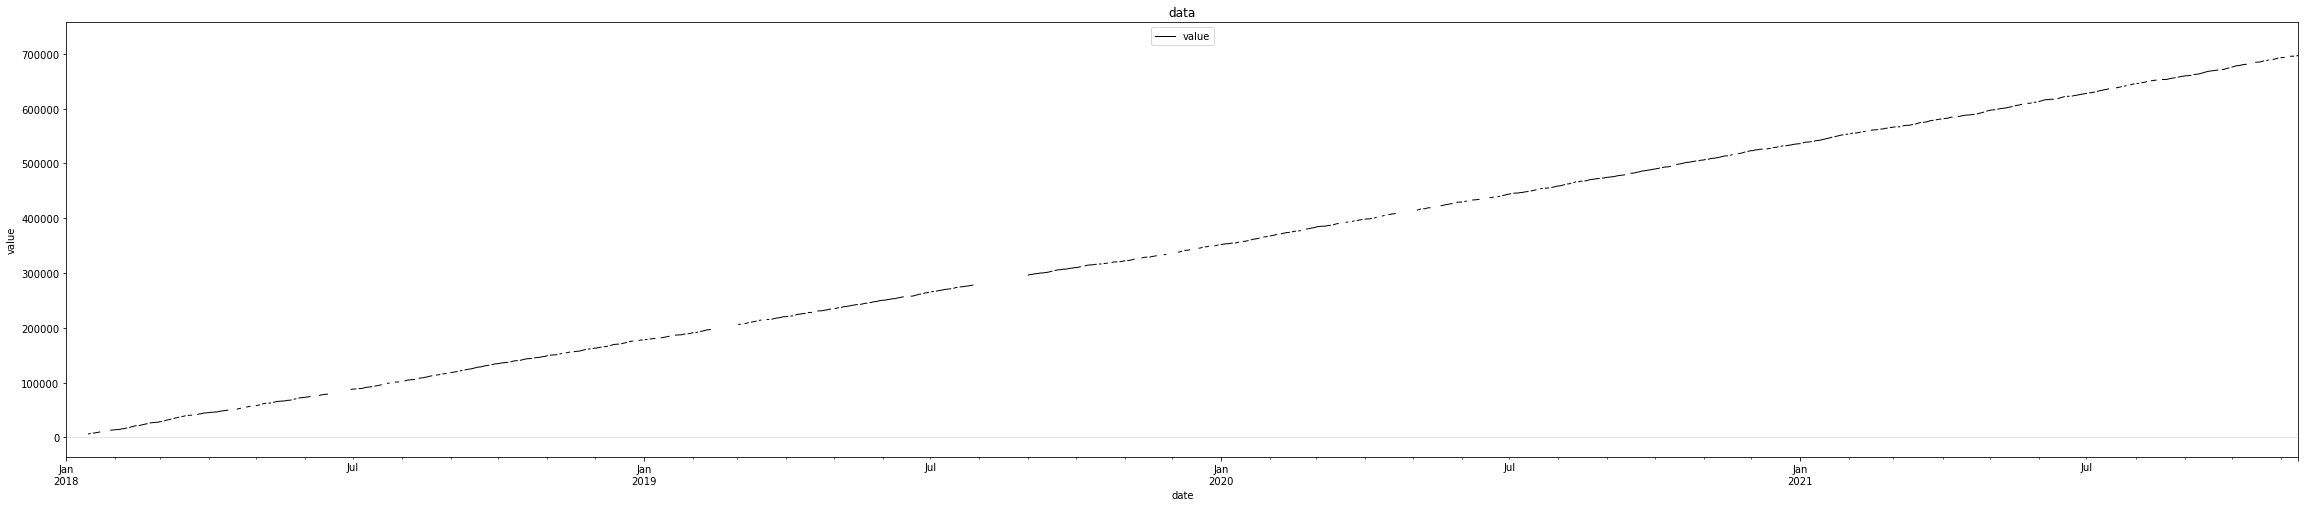

In [3]:
url = 'C:/pythonushka/my_new_file999.csv'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True,
                  squeeze=True)
 
ma = vix.rolling('1d').mean()
state = pd.cut(
    ma, bins=[-np.inf, 14, 18, 24, np.inf], labels=range(4)
)
 
ma.plot(
    color='black', linewidth=1, marker='', figsize=(40, 8)
)
 
ax = plt.gca()  # получаем текущий объект Axes, на который ссылается ma.plot()
ax.set_xlabel('date')
ax.set_ylabel('value')
ax.set_title('data')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-50])
 
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)

ax.fill_between(ma.index, 100, 400)
 
plt.show()

<AxesSubplot:xlabel='date'>

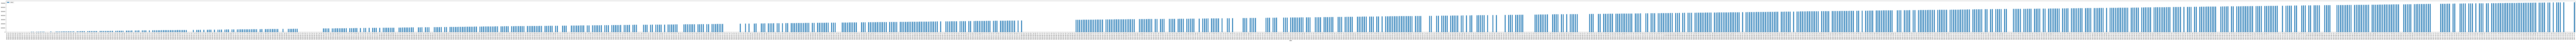

In [4]:
df.plot.bar(x='date', y='value', figsize=(400,5))

## интерполяция

            date          value
0     2018-01-01      79.367000
1     2018-01-02     534.502643
2     2018-01-03     989.638286
3     2018-01-04    1444.773929
4     2018-01-05    1899.909571
...          ...            ...
1456  2021-12-27  720639.764333
1457  2021-12-28  720857.256500
1458  2021-12-29  721074.748667
1459  2021-12-30  721292.240833
1460  2021-12-31  721509.733000

[1461 rows x 2 columns]
Настоящие значения, не превышающие предыдущих:
 Empty DataFrame
Columns: [date, value, delta]
Index: []


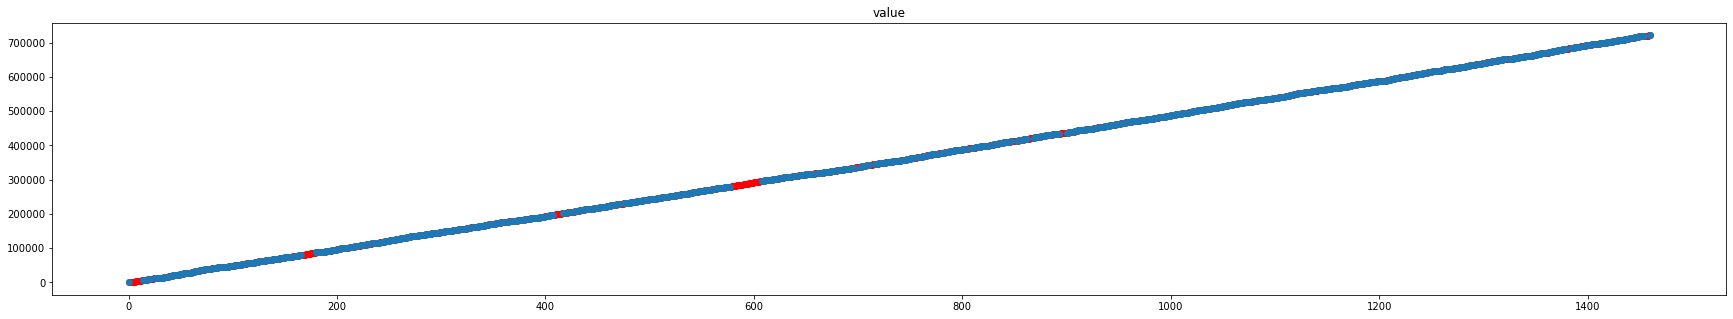

In [5]:
quadratic_imput=df.copy(deep=True)
quadratic_imput.interpolate(method='polynomial', order=1, inplace=True)
quadratic_imput['value'].plot(color='red', marker='o', linestyle='dotted', figsize=(30, 5))
df['value'].plot(title='value', marker='o', figsize=(30, 5))
print(quadratic_imput)

# Функция покажет если есть предыдущие значения больше последующих

quadratic_imput['delta'] = quadratic_imput['value'].T.diff().fillna(0).astype('float64')  
data_delta_age_negative = quadratic_imput [quadratic_imput ['delta'] <0]
print('Настоящие значения, не превышающие предыдущих:\n',data_delta_age_negative)

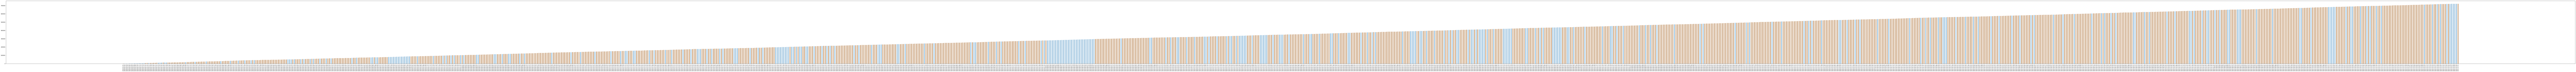

In [6]:
#missing = pd.read_csv('C:/pythonushka/my_new_file999.csv')

w=0.5
x = data['date']
value = quadratic_imput['value']
value2 = data['value']

#bar1 = np.arange(len(x))
#bar2 = [i+w for i in bar1]

plt.bar(x, value, w, alpha=0.5)
plt.bar(x, value2, w, alpha=0.5)

plt.gcf().set_size_inches(400, 10)
plt.xticks(x, rotation = 90)
plt.show()


C:\Python\Anaconda3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


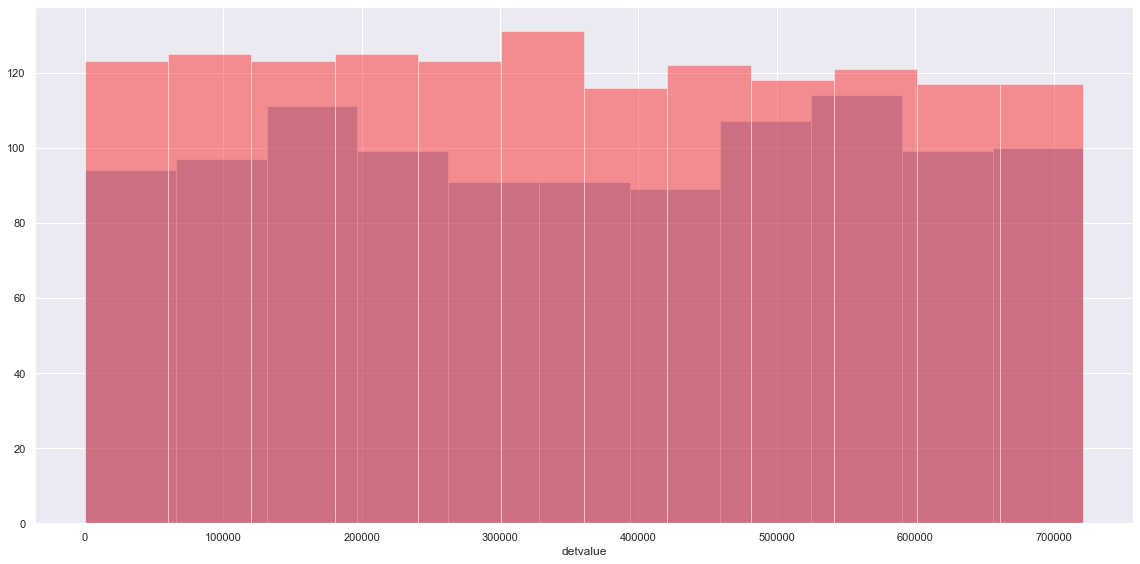

In [7]:
df['detvalue'] = quadratic_imput.value
sns.set()
fig, axes = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(16, 8)
sns.distplot(data["value"].dropna(), kde = False)
sns.distplot(df['detvalue'], kde = False, color = 'red')
    
plt.tight_layout()

In [8]:
pd.concat([data[["value"]], df[["detvalue"]]], axis = 1).describe().T

count           mean            std     min           25%  \
value     1092.0  365455.260759  208691.985723  79.367  179884.16875   
detvalue  1461.0  356940.668682  208006.545269  79.367  178150.19850   

                 50%           75%         max  
value     368599.560  546382.32725  721509.733  
detvalue  352172.934  535867.07400  721509.733

In [9]:
print(data["value"].std() - df["detvalue"].std())

685.440454433643


# 685.440454433643

# Стандартная ошибка (std)  хорошая


Мы можем представить себе этот факт разными способами. 
Первый - это построение гистограмм как для неполных, так и для полных данных, 
на которых мы можем заметить, что график полных данных выше и уже по сравнению с графиком неполных данных. 
Другими словами, полные данные имеют меньшее стандартное отклонение (следовательно, меньшую изменчивость), 
чем неполные данные. Другой метод - построить коробчатую диаграмму, 
на которой мы можем наблюдать, что диапазон IQ довольно сжат для полных данных по сравнению с таковым в неполных данных.

# ВЫВОДЫ:
Модель хорошо подходит для восстановления данных с линейной зависимостью. Модель хорошо справляется с даннными где большие пропуски и лучше если они еденичные. Так как полиномиальная модель не подходит для линейно зависимых значений, мы используем первый порядок, что говорит нам о том что интеполяция пройдет линейным способом, т.е. соединением двух точек между которыми пропуки. 